# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План работ:
- Знакомство с данными - подготовим импорты, оценим состояние и размер датафрейма.
- Предобработка данных - оценим корректность выбранных типов данных и названий столбцов, по возможности заполним все пропуски в данных, удалим дубликаты, аномалии и выбросы, подготовим необходимые для дальнейшего анализа колонки (категоризируем данные).
- Исследовательский анализ данных - будем находить закономерности и взаимосвязи в данных.
- Вывод

Задача данного исследования - определение степени влияния параметров на стоимость недвижимости, для построения системы определения рыночной стоимости недвижимости. В дальнейшем эти данные будут нужны для построения автоматизированной системы для отслеживания аномалий и мошеннической деятельности.

## Откроем файл с данными и изучим общую информацию. 

В этом разделе мы откроем предоставленный датафрейм и познакомимся с данными. Построим общую гистограмму для всех числовых столбцов таблицы.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('real_estate_data.csv', sep='\t')

df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
# Изучим общую информацию о полученном датафрейме.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# Посмотрим общую информацию по всем числовым столбцам.
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
# Оценим корректность названий столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

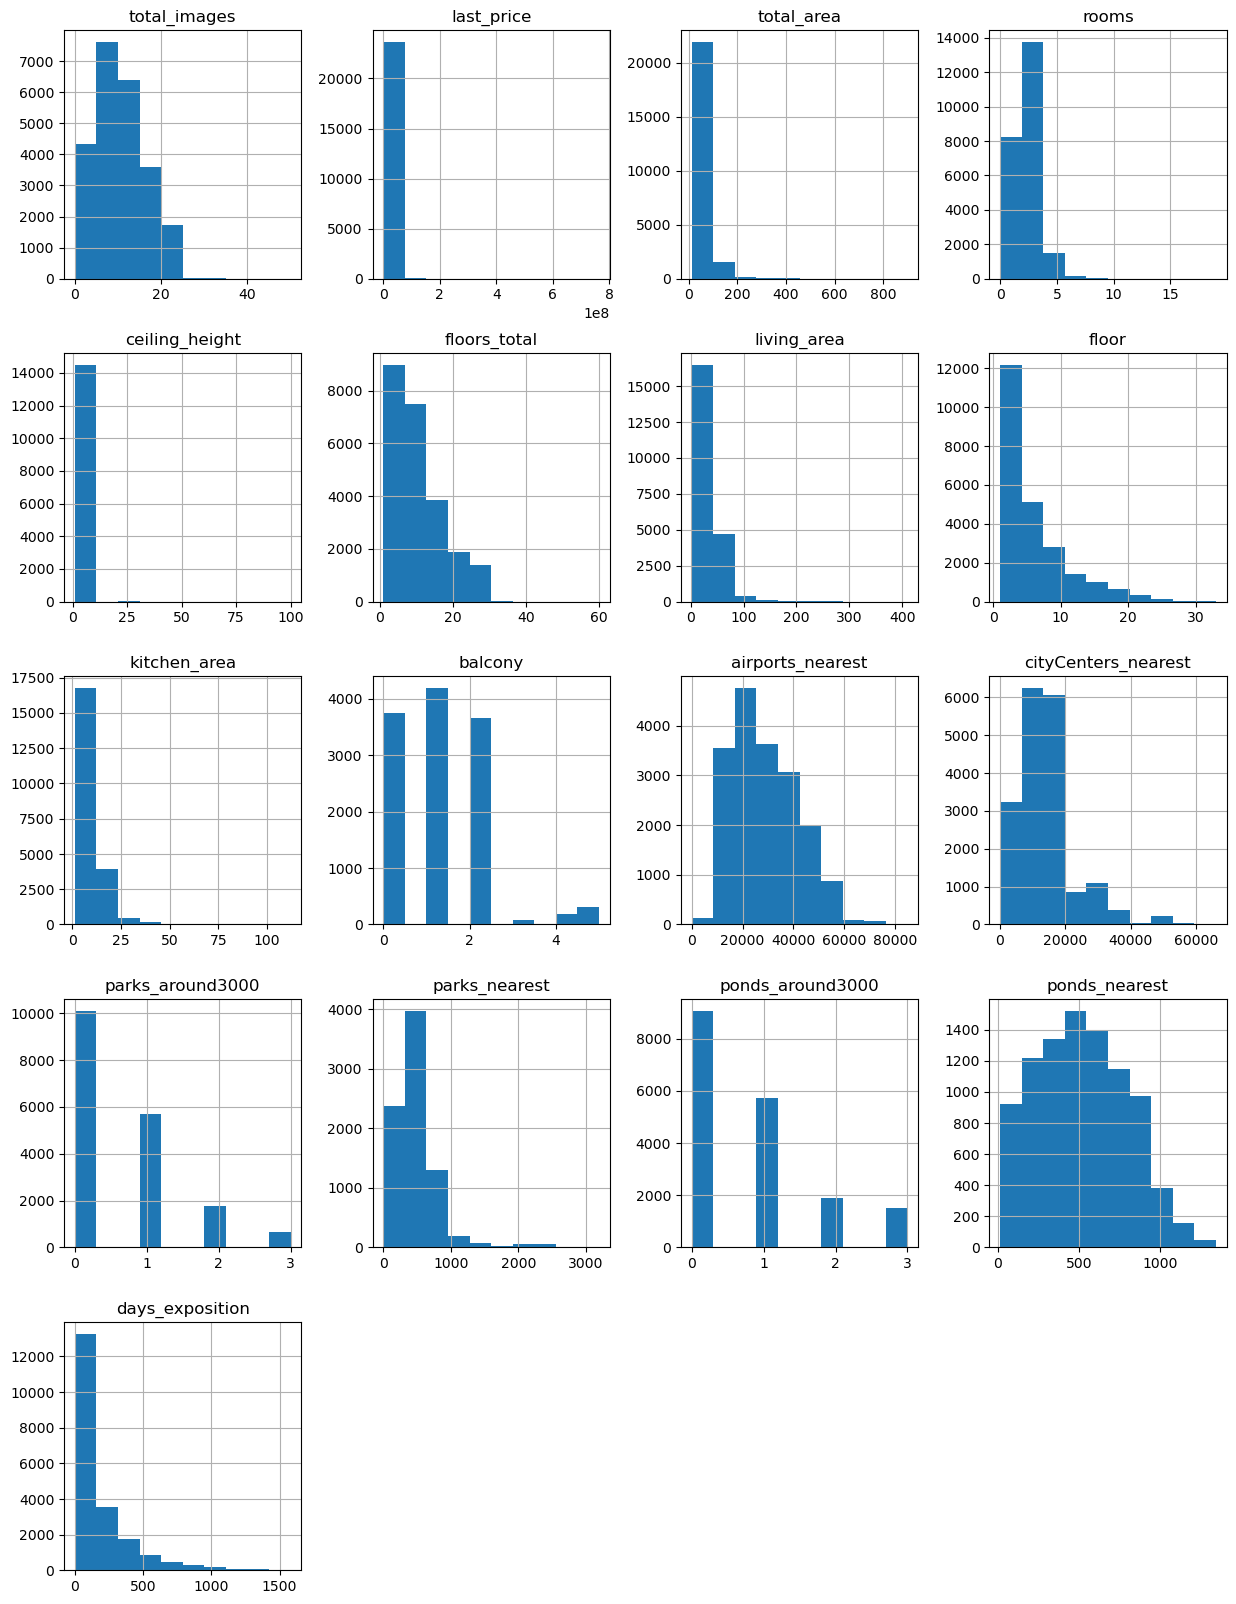

In [5]:
# Строим общую гистограмму для всех числовых столбцов таблицы.
df.hist(figsize=(15, 20));

**Вывод:**

Файл содержит 23698 обьявлений, каждое описывается 22 признаками (столбцами) 17 из которых числовые, 3 категориальных булевого типа ('is_apartment', 'studio', 'open_plan'), 1 категориальный строкового типа содержит название населеного пункта ('locality_name'), и 1 содержит строковое представление даты ('first_day_exposition'). \
В данных есть проблемы:
- пропуски; 
- аномалии, например потолки высотой 25м в столбце 'ceiling_height';
- некоторые названия столбцов нуждаются в коррекции : 'cityCenters_nearest' насписан в разном регистре, у булевых столбцов разный стиль написания;
- часть столбцов имеют некорректный тип данных :'floors_total', 'balcony', 'parks_around3000', 'parks_nearest',	'ponds_around3000',	'ponds_nearest', 'days_exposition' - имеют вещественный тип данных, но для сокращения времени обработки датафрейма и корректности тут более уместен целочисленный тип данных, 'is_apartment' - строковый вместо типа bool.

Все эти проблемы мы обработаем на следующем этапе.

## Предобработка данных

В этом разделе мы обработаем замечания из предыдущего этапа, а также выявим явные и неявные дубликаты.

Чтобы сохранить максимальную ценность датафрейма, перед проведением предобработки зафиксируем количество данных, которые он содержит. В конце этого раздела сравним количество данных в датафрейме до и после предобработки.

In [6]:
df_old_shape = df.shape
df_old_shape

(23699, 22)

### Исправим названия столбцов

In [7]:
# Заменим имена столбцов на корректные
df = df.rename(columns={'cityCenters_nearest': 'city_center_distance', 'studio': 'is_studio', 'open_plan': 'is_open_plan'})

# Проверим изменения
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_distance,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


###  Обработка пропусков

In [8]:
# Отобразим количество пропусков в таблице по столбцам в процентах
(df.isna().sum() / len(df)).round(4) * 100

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
is_studio                0.00
is_open_plan             0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
city_center_distance    23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

Пропуски есть в половине столбцов, как категориальных, так и количественных.\
Чтобы предотвратить ухудшение статистической ценности таблицы, пропуски мы будем заменять на медианные значения, где возможно учитывая значения в других, коррелирующих столбцах.\
Напишем функцию для нахождения колонок с максимальной корреляцией для всех числовых колонок. Это поможет нам сделать обзор связей колонок между собой.

In [9]:
# Напишем функцию для нахождения пар колонок с максимальной корреляцией
def get_columns_with_max_correlation(data) -> list[dict[str: int]]:
    max_corr_list = []
    # чтобы не было ошибки, ограничим нужные колонки только числовыми
    columns = data.select_dtypes(include='number').columns
    for indx in range(len(columns)):
        correlation_temp = ['', 0]
        for indx2 in range(len(columns)):
            if columns[indx] != columns[indx2]:
                correlation = data[columns[indx]].corr(data[columns[indx2]])
                if correlation_temp[1] < abs(correlation):
                    correlation_temp = [columns[indx2], correlation]
        max_corr_list.append({columns[indx]: correlation_temp})
    return max_corr_list


# Выведем на экран общий список, где ключ словаря колонка, для которой ищем наиболее коррелирующую.
# Значение словаря - список из наиболее коррелирубщей колонки и размера корреляции.
get_columns_with_max_correlation(df)

[{'total_images': ['balcony', 0.12169301923631218]},
 {'last_price': ['total_area', 0.6536750579657249]},
 {'total_area': ['living_area', 0.9395373338721499]},
 {'rooms': ['living_area', 0.8459774567888749]},
 {'ceiling_height': ['total_area', 0.09549044852366353]},
 {'floors_total': ['floor', 0.6780586338440981]},
 {'living_area': ['total_area', 0.9395373338721498]},
 {'floor': ['floors_total', 0.678058633844098]},
 {'kitchen_area': ['total_area', 0.6091211711198319]},
 {'balcony': ['floors_total', 0.1940649216563219]},
 {'airports_nearest': ['city_center_distance', 0.2721843883561957]},
 {'city_center_distance': ['airports_nearest', 0.2721843883561956]},
 {'parks_around3000': ['ponds_around3000', 0.30431550220564313]},
 {'parks_nearest': ['ponds_around3000', 0.07728043875581261]},
 {'ponds_around3000': ['days_exposition', 0.07316195828497744]},
 {'ponds_nearest': ['days_exposition', -0.07787902433573361]},
 {'days_exposition': ['total_area', 0.14967517208715725]}]

Заполним случайные пропуски:
- Площадь кухни у квартир студий заменим на нули;
- В is_apartment проставим False там, где в is_studio или is_open_plan стоят True, на остальные значения поставим True, так как наша выборка это архив о продаже квартир;
- У столбца balcony слабая связь с floors_total, видимо связь все же есть, но также есть еще зависимости с другими параметрами, например с количством комнат. Логично, что 3 балкона не может быть у однокомнатной квартиры. Однозначно можно утверждать, что пропуски у однокомнатных квартир и студий связаны с отсутствием балкона вовсе, поэтому в этом случае произведем замену на нули. Остальные случаи оставим без изменения, так как однозначно утверждать, что в квартирах с большим количеством комнат все пропуски связаны с отсутствием балконов, мы не можем. Так как процент пропусков слишком высок, заполнение медианой или удаление строк ухудшит статистическую ценность таблицы.
- Пропуски в столбце ceiling_height объективно ничем не обоснованны, с другими колонками корреляции нет, поэтому заполним их медианой.
- Случаев с пропусками в столбцеах locality_name и floors_total всего 0,21% и 0,36% соответственно, поэтому мы их просто удалим.
- Признаки living_area и kitchen_area сильно коррелируют с колонкой total_area, поэтому мы заполним эти поля медианой, с учетом категориальной колонки rooms.
- Процент пропусков в days_exposition 13.42, заполним их медианой. 

In [10]:
# Обрабатываем пропуски в kitchen_area, если квартира - студия
df.loc[df['is_studio'] == True, 'kitchen_area'] = 0

# Обрабатываем пропуски в is_apartment
df.loc[(df['is_studio'] == True) & (df['is_open_plan'] == True), 'is_apartment'] = False
df.loc[df['is_apartment'].isna(), 'is_apartment'] = True

In [11]:
# Оценим результат
(df.isna().sum() / len(df)).round(4) * 100

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment             0.00
is_studio                0.00
is_open_plan             0.00
kitchen_area             8.98
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
city_center_distance    23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

In [12]:
# Заменим (для строк с пропусками) количество балконов в однокомнатных квартирах и студиях на ноль
df.loc[(df['balcony'].isna()) & (df['rooms'] == 1), ['balcony']] = 0
df.loc[(df['balcony'].isna()) & (df['is_studio'] == True), ['balcony']] = 0

In [13]:
# Заполним пропуски в ceiling_height медианой
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

In [14]:
# Заполним пропуски на константу - 0
df['city_center_distance'] = df['city_center_distance'].fillna(0)

In [15]:
# Заполним пропуски в kitchen_area и living_area медианой, разделив по категориям на основнии колонки rooms
for column in ['kitchen_area', 'living_area']:
    for room in df['rooms'].unique():
        df.loc[(df[column].isna()) & (df['rooms'] == room), column] = \
        df.loc[(df[column].notna()) & (df['rooms'] == room), column].median()

In [16]:
# Удалим строки с пропусками в locality_name и floors_total
df = df.dropna(subset=['locality_name','floors_total']).reset_index(drop=True)

In [17]:
# Оценим результат
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area                0
balcony                  7622
locality_name               0
airports_nearest         5524
city_center_distance        0
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Вывод** \
Мы обработали большое количество пропусков. Часть из них мы не смогли заполнить, поэтому чтобы улучшить сбор данных и сделать точнее анализ данных в будущем, рекомендуется количество балконов сделать на основании выпадающего списка - ChoiceField. \
Пропуски в колонках, данные для которых были получены с помощью картографических сервисов, мы не обработали, так как это приведет к искажению, и в целом почти все столбцы в дальшейшем анализе фактически не участвуют. \
У 13% случаев не заполнено поле days_exposition, видимо эти квартиры не были проданы, поэтому в дальнейшем рекомендуется предусмотреть для таких случаев дополнительное поле-маркер, чтобы можно было отличить ошибку выгрузки, от непроданных квартир. \
Также рекомендуется в поле is_apartment автоматически проставлять True, убрать это поле из формы клиента, оставив только возможность заполнения полей is_studio и is_open_plan, это сократит форму и сократит услия для ее заполнения, что положительно скажется на сокращении пропусков в других столбцах. 

### Изменение типа колонок

Для оптимизации использования памяти, сокращения времени обработки таблицы компьютером и более удобного восприятия информации, поменяем тип данных в части колонок с вещественного на целочисленный.
Также изменим тип данных столбца is_apartment на корректный - bool и приведем к типу datetime даты в столбце first_day_exposition, чтобы в дальнейшем можно было совершать операции с датами.

In [18]:
# Изменяем тип данных в столбцах на int (старый набор колонок, из-за отмены обработки NaN поменять на int их нельзя)
columns_to_change_old = ['last_price', 'floors_total', 'floors_total', 'airports_nearest', 
                     'city_center_distance', 'parks_around3000', 'parks_nearest', 
                     'ponds_around3000', 'ponds_nearest', 'days_exposition']

# Изменяем тип данных в столбцах на int
columns_to_change = ['last_price', 'floors_total', 'floors_total']

for column in columns_to_change:
    df[column] = df[column].astype(int)

# Изменяем тип данных в колонке is_apartment на bool
df['is_apartment'] = df['is_apartment'].astype(bool)

# Приводим к datetime и сократим колонку first_day_exposition
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d')

# Оценим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  is_studio             23565 non-null  bool          
 11  is_open_plan          23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### Обработка дубликатов

Сначала мы обработаем неявные дубликаты в категориальных колонках, после этого с помощью метода duplicated() найдем явные дубликаты.

In [19]:
# Удалим все слова, кроме уникальных названий населенных пунктов
df['locality_name'] = (
    df['locality_name']
    .str.replace(r'(город\s+|поселок\s+|посёлок\s+|деревня\s+|городского типа\s+|садовое товарищество\s+|при железнодорожной станции\s+|cадоводческое некоммерческое товарищество\s+|городской\s+|коттеджный\s+|село\s+|станции\s+|пансионат\s+|садоводческое некоммерческое товарищество\s+)(?=\w)', ' ')
    .str.strip()
)

# Переводим все значения в столбце в нижний регистр
df['locality_name'] = df['locality_name'].str.lower()

# Удаляем все символы, кроме букв и цифр
df['locality_name'] = df['locality_name'].str.replace(r'[^\w\d]+', '')

# Проверим есть ли названия населенных пунктов-дубликаты
sorted(df['locality_name'].unique())

C:\Users\Viva\AppData\Local\Temp\ipykernel_18376\2304400727.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(r'(город\s+|поселок\s+|посёлок\s+|деревня\s+|городского типа\s+|садовое товарищество\s+|при железнодорожной станции\s+|cадоводческое некоммерческое товарищество\s+|городской\s+|коттеджный\s+|село\s+|станции\s+|пансионат\s+|садоводческое некоммерческое товарищество\s+)(?=\w)', ' ')
C:\Users\Viva\AppData\Local\Temp\ipykernel_18376\2304400727.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['locality_name'] = df['locality_name'].str.replace(r'[^\w\d]+', '')


['агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большаявруда',
 'большаяижора',
 'большаяпустомержа',
 'большиеколпаны',
 'большоерейзино',
 'большойсабск',
 'бор',
 'борисовагрива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахновакара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружнаягорка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпосёлок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зимитицы',
 'ивангород',
 'извара',
 'ильичёво',
 'имениморозова',
 'именисвердл

In [20]:
# Заменим найденый дубликат
df['locality_name'] = df['locality_name'].replace('коммунары', 'коммунар')

# Проверим есть ли строки-дубликаты
df.duplicated().sum()

0

С помощью регулярного выражения мы заменили много дублирующихся названий населенных пунктов. \
Рекомендуется перевести заполнение данного пункта на тип ChoiceField - заполнение из выпадающего списка, либо на основании катографических данных.

### Обработка аномалий и выбивающихся значений

Сначала, воспользовавшись методом value_counts(), найдем и обработаем аномалии, далее сформируем диаграмму размаха, используем метод межквартильного размаха (IQR), чтобы определить выбросы, затем обработаем или удалим эти строки. Также, всвязи с нерепрезентативностью, мы удалим низкочастотные случаи.

In [21]:
# Вывод описательной статистики для всех числовых столбцов DataFrame
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_center_distance,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,15943.000000,18041.000000,23565.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.324580,5.878124,10.367146,0.877501,28797.082701,10879.530617,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,21.721222,4.871485,5.724584,1.055948,12632.499735,9639.346166,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.200000,0.000000,18565.000000,2186.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.000000,1.000000,26757.000000,11246.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,2.000000,37273.000000,15237.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'first_day_exposition'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>],
       [<Axes: title={'center': 'city_center_distance'}>,
        <Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>],
       [<Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >]],
      dtype=object)

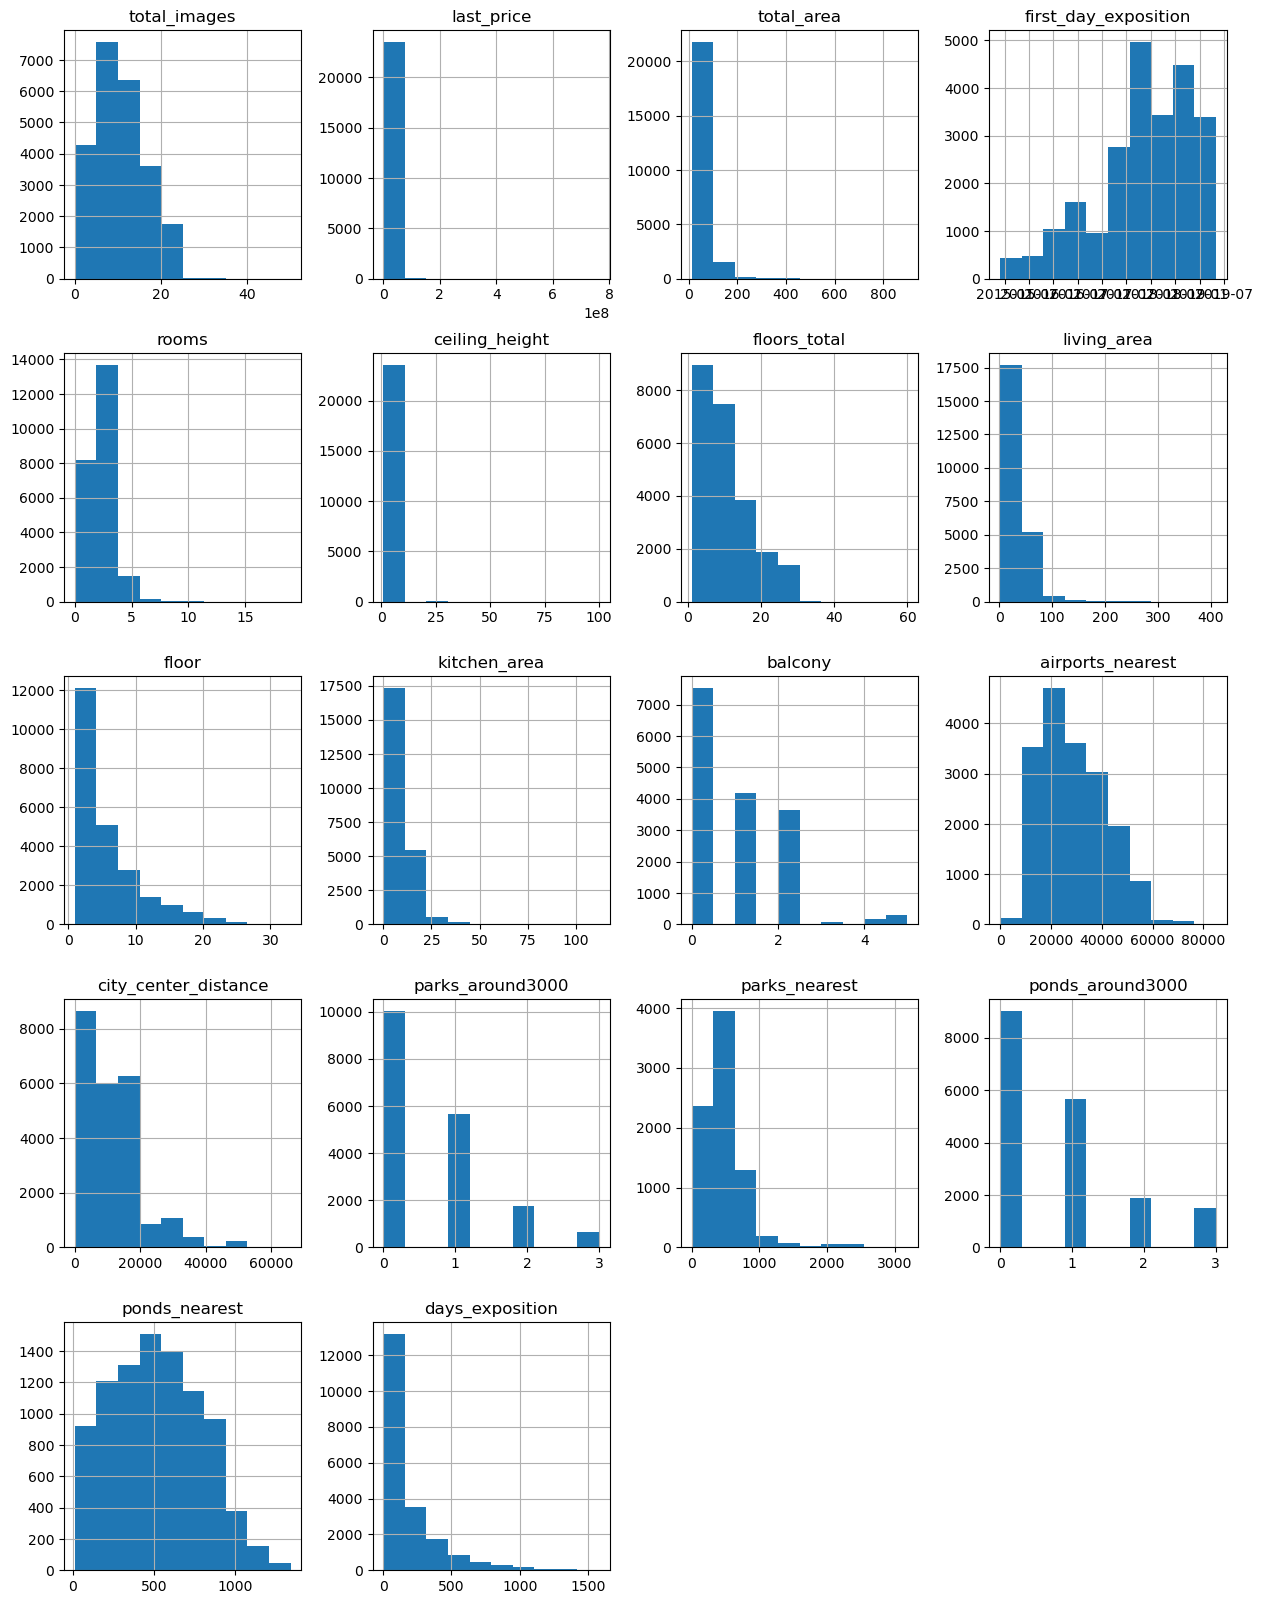

In [22]:
# Строим общую гистограмму для всех числовых столбцов таблицы, чтобы визуально выявить наличие аномальных значений.
df.hist(figsize=(15, 20))

В колонке ceiling_height есть квартиры, с высотой потолков до 100 м., но существование таких квартир невозможно, поэтому рассмотрим значения в данной колонке более детально. Учитывая, что есть довольно много случаев в районе 25 м., возможно присутствует ошибка записи - некорректно проставлена запятая.

In [23]:
# Оценим значения в столбце ceiling_height
sorted(df['ceiling_height'].unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,

Приведем в нормальный формат случаи с высотой от 20 до 32 м., оставшиеся двухзначные и трехзначние случаи восстановить нельзя (высота 1, 1.4 и 10 м с точки зрения здравого смысла - маловероятны). Заменим их на медиану.

In [24]:
# Обработаем некорректные значения
for col in df['ceiling_height']:
    if col >= 20 and col <= 32:
        df.loc[df['ceiling_height'] == col, 'ceiling_height'] = col / 10

# Заменим на медиану некорректные значения. 
df.loc[df['ceiling_height'] >= 10, 'ceiling_height'] = df['ceiling_height'].median()

Чтобы выделить колонки с выбросами, построим диаграммы размаха по всем колонкам.

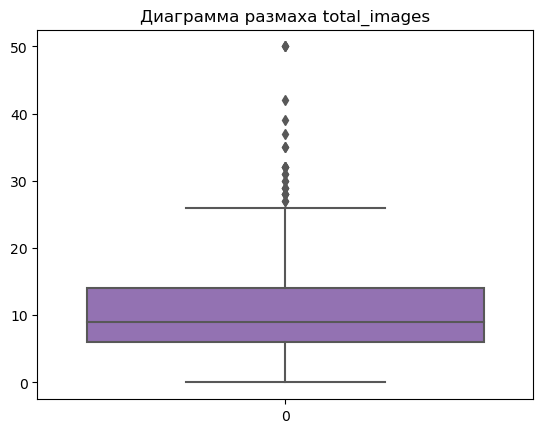

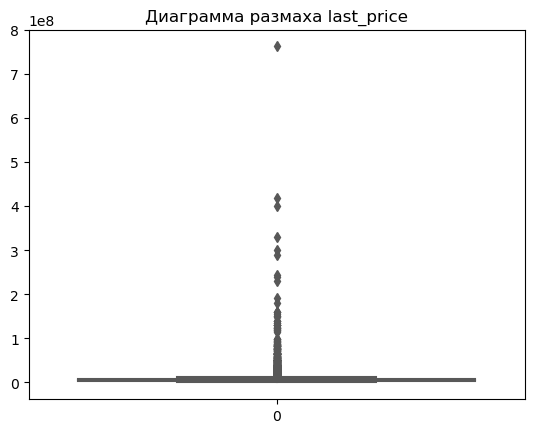

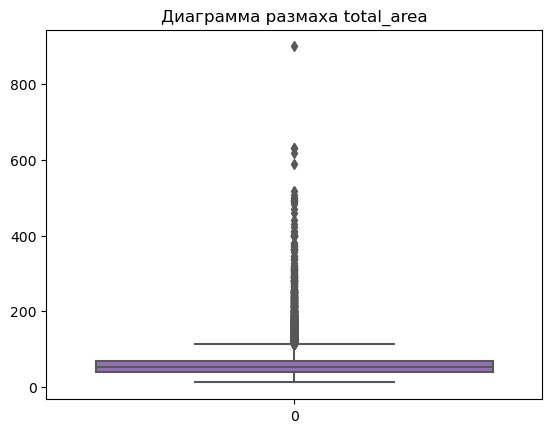

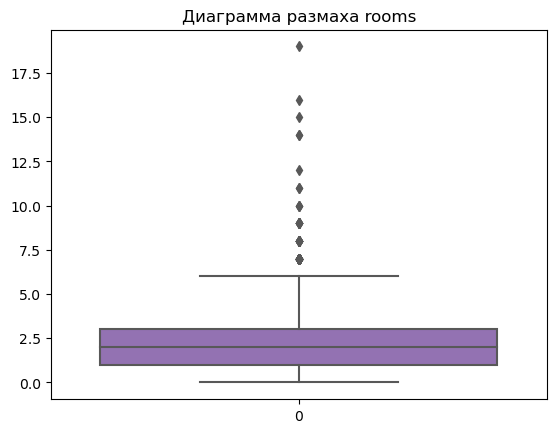

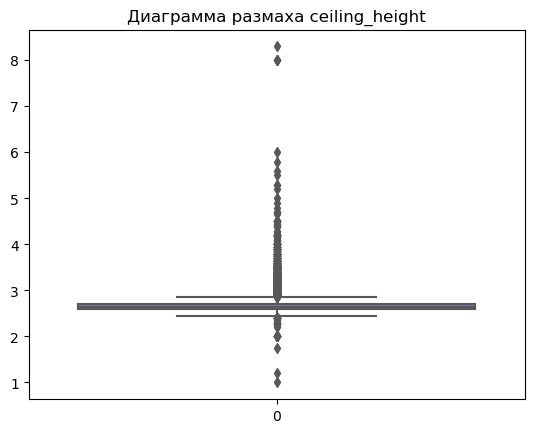

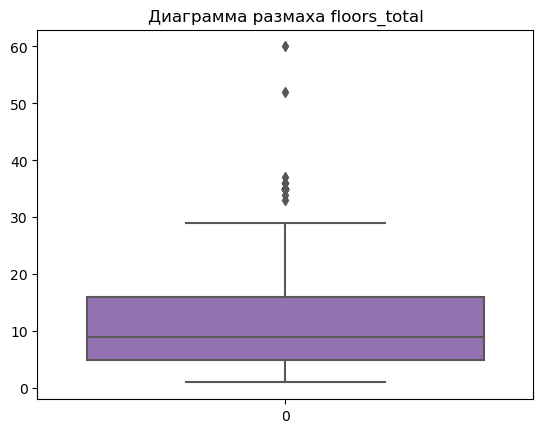

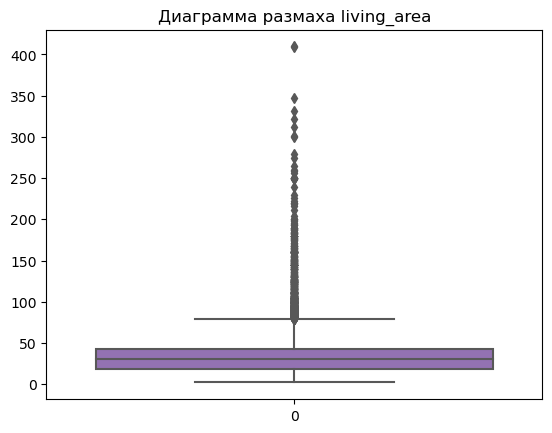

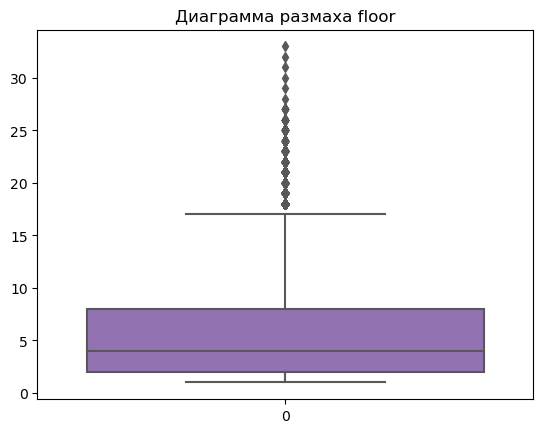

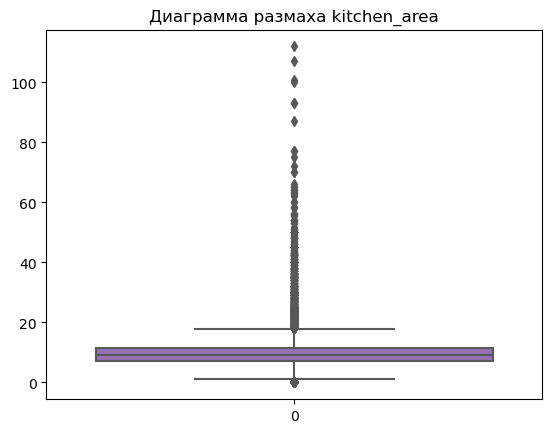

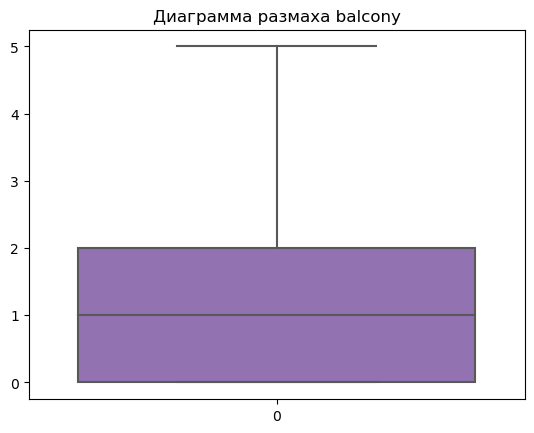

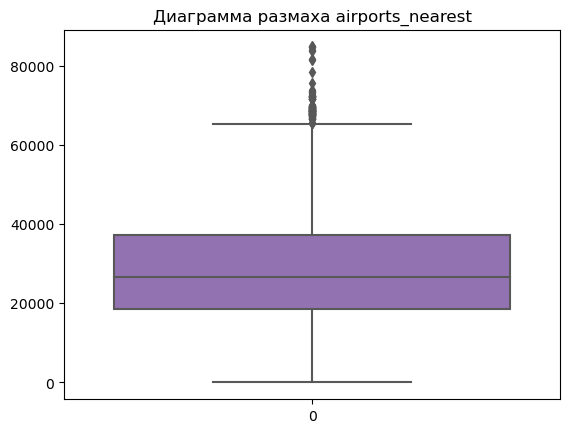

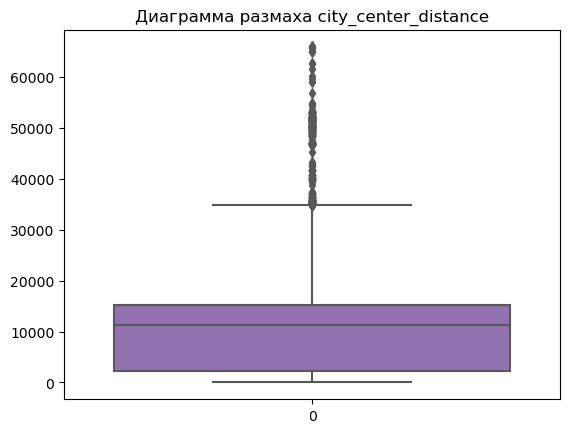

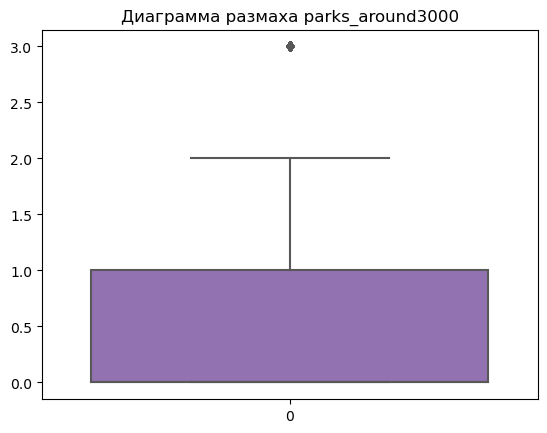

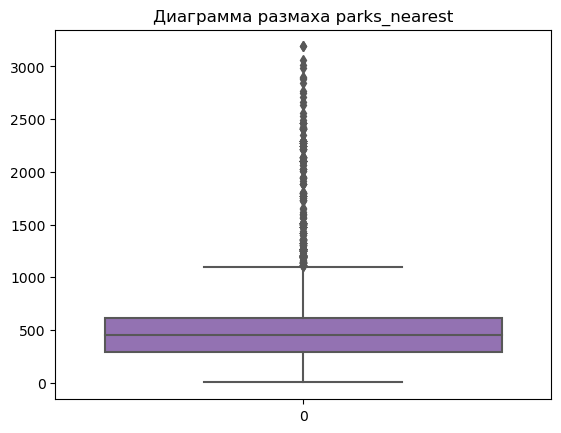

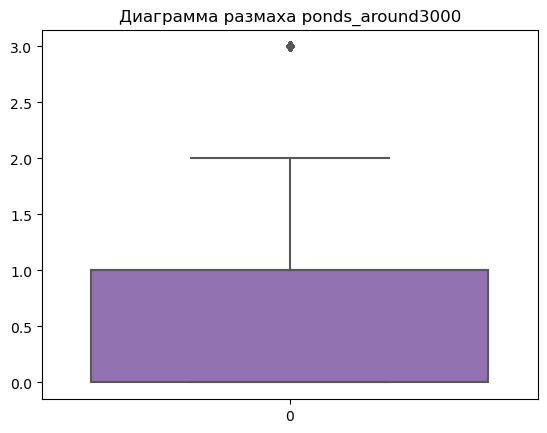

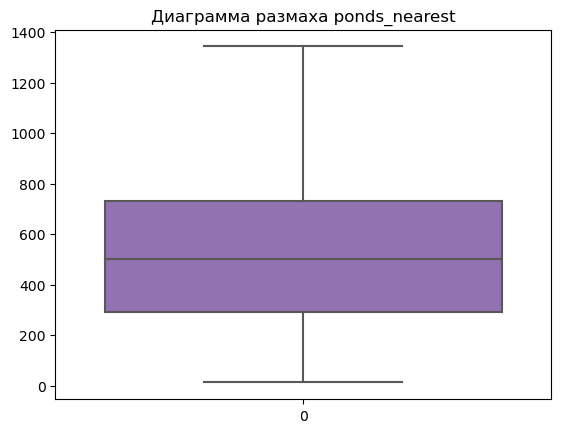

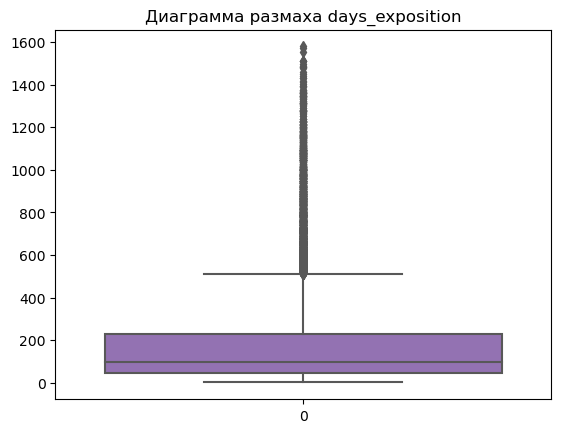

In [25]:
# Выберем все числовые колонки
columns = df.select_dtypes(include='number').columns

# Строим диаграммы размаха в цикле по всем числовым колонкам
for column in columns:
    sns.boxplot(df[column], color='tab:purple')
    plt.title(f'Диаграмма размаха {column}')
    plt.show()

Как видим, выбросы есть во всех колонках, кроме balcony. Посмотрим процент строк с выбросами от всего датафрейма.

In [26]:
# Cоздадим новую колонку, где True будут обозначены строки, у которых хоть одно значение является выбросом 
df['is_anomal'] = False
for column in columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), 'is_anomal'] = True


# Отобразим в процентах от датафрейма количество аномальных значений
val_count = df['is_anomal'].value_counts()
'Аномальные значения составляют {:.1%}'.format(val_count[1] / (val_count[0] + val_count[1]))

'Аномальные значения составляют 33.4%'

Количество аномальных значений во всех столбцах слишком велико, поэтому будем удалять их точечно - только в нужных нам для проведения анализа столбцах.

In [27]:
# Создадим функцию для отображения границ выбросов
def borders_of_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

print(
    borders_of_outliers('total_area'),
    borders_of_outliers('kitchen_area'),
    borders_of_outliers('living_area')
)

(-4.550000000000004, 114.25) (0.7500000000000009, 17.95) (-18.050000000000004, 79.15)


In [28]:
# Удалим выбросы в ключевых колонках
df = df.query('total_area < 115 and '
              'kitchen_area < 18 and '
              'living_area < 80')

***Удалим низкочастотные случаи***

Удалим редкие значения из столбца 'rooms'

In [29]:
# Оценим количество случаев в каждой категории
df['rooms'].value_counts()

1    7839
2    7463
3    5083
4     746
0     193
5      59
6       4
Name: rooms, dtype: int64

In [30]:
# Удалим квартиры с 5-ю и 6-ю комнатами
df = df.query('rooms < 5')

**Вывод:** \
В ходе очистки данных, мы выявили аномалии в столбце ceiling_height - некоторые значения были введены с неправильно проставленной запятой, а также некоторые значения имеют нереальные значения, которые воостановить не удалось. Наличие таких аномалий говорит о том, что данные вводились вручную. Рекомендуется поставить ограничение на это поле при вводе клиентом - высота потолков не может быть двузначным значением и более.

In [31]:
# Оценим количество сохраненных данных
'От исходного датафрейма сохрано данных {:.1%}'.format(df.shape[0] / df_old_shape[0])

'От исходного датафрейма сохрано данных 90.0%'

### Посчитайте и добавьте в таблицу новые столбцы

В этом разделе мы добавим необходимые для дальнейшего анализа колонки:
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

In [32]:
# Добавим цену квардратного метра
df['price_sqm'] = round(df['last_price'] / df['total_area'], 1)

# День публикации объявления 
df['weekday'] = df['first_day_exposition'].dt.weekday

# месяц публикации объявления
df['month'] = df['first_day_exposition'].dt.month

# Год публикации объявления
df['year'] = df['first_day_exposition'].dt.year

# Тип этажа квартиры
df.loc[df['floor'] == 1, 'floor_type'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'последний'
df.loc[df['floor_type'].isna(), 'floor_type'] = 'другой'

# Расстояние в км до центра города и округляем
df['city_center_distance_km'] = round((df['city_center_distance'] / 1000), 0).astype(int)

# Оценим результат
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,is_anomal,price_sqm,weekday,month,year,floor_type,city_center_distance_km
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0.0,NaN,81.0,False,82920.8,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,2.0,574.0,558.0,True,92785.7,3,8,2015,другой,14
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,55.0,False,95065.8,0,9,2018,другой,0
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0.0,NaN,155.0,False,99195.7,3,11,2017,другой,19
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,NaN,189.0,True,87454.8,2,5,2018,другой,0


Мы добавили необходимые для дальнейшего анализа новые столбцы:
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

А также удалили низкочастотные случаи в столбце 'year' - случаи за 2014 год.

### Проведите исследовательский анализ данных

В этом разделе мы выясним, какие продажи можно считать типичными, составим портрет самой популярной и наименее востребованной квартиры.
Выявим какие факторы больше всего влияют на стоимость объекта. Построим графики, которые покажут зависимость цены от указанных ниже параметров.
- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

Опишем основные параметры, для данного исследования:
- **total_area** - количественный вещественный параметр, площадь квартиры в квадратных метрах;
- **living_area** - количественный вещественный параметр, жилая прощадь в квадратных метрах;
- **kitchen_area** - количественный вещественный параматр, площадь кухни в квадратных метрах;
- **last_price** - количественный целочисленный параметр, последняя цена квартиры в рублях;
- **rooms** - количественный целочисленный параметр, количество комнат в квартире;
- **ceiling_height** - количественный вещественный параметр, высота потолков квартиры;
- **floor** - количественный целочисленный параметр этажа, на котором находится квартира;
- **floor_type** - категориальный строковый параметр, тип этажа квартиры;
- **floors_total** - количественный целочисленный параметр, общая этажность дома, в котором нахоится квартира;
- **city_center_distance** - количественный целочисленный параметр, расстояние до центра города в метрах;
- **airports_nearest** - количественный целочисленный параметр, расстояние до ближайшего аэропорта в метрах;
- **parks_nearest** - количественный целочисленный параметр, расстояние до ближайшего парка в метрах;;
- **weekday** - целочисленный категориальный параметр, день публикации объявления;
- **month** - целочисленный категориальный параметр, месяц публикации объявления;
- **price_sqm** - вещественный количественный параметр, цена квадратного метра квартиры;
- **days_exposition** - целочисленный количественный параметр, количество дней присутствия обьявления на сайте.

Построим по каждому числовому столбцу без пропусков гистограмму. 

In [33]:
# Оценим результат
df.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                   0
living_area                    0
floor                          0
is_apartment                   0
is_studio                      0
is_open_plan                   0
kitchen_area                   0
balcony                     6498
locality_name                  0
airports_nearest            5329
city_center_distance           0
parks_around3000            5312
parks_nearest              14553
ponds_around3000            5312
ponds_nearest              13604
days_exposition             2659
is_anomal                      0
price_sqm                      0
weekday                        0
month                          0
year                           0
floor_type                     0
city_center_distance_km        0
dtype: int64

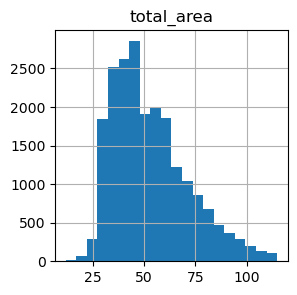

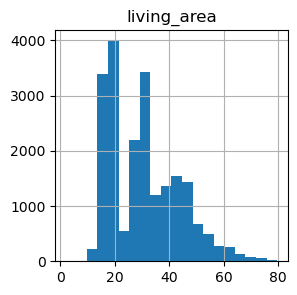

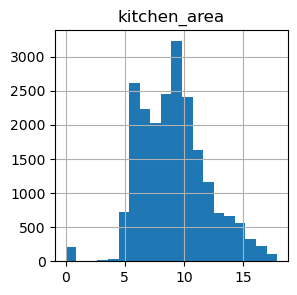

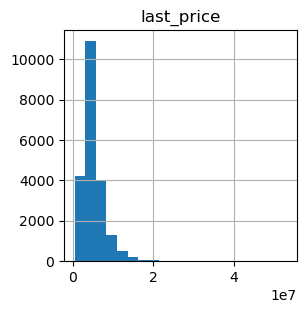

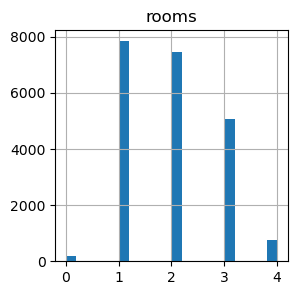

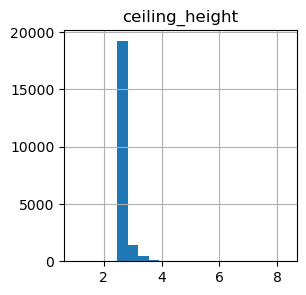

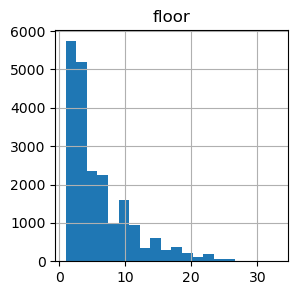

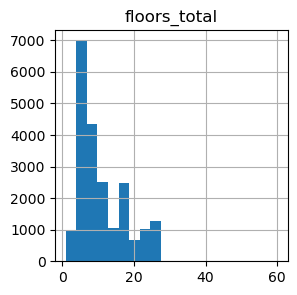

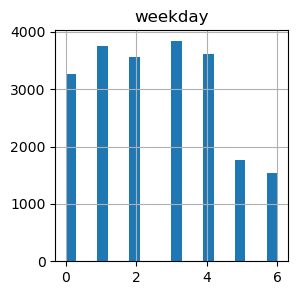

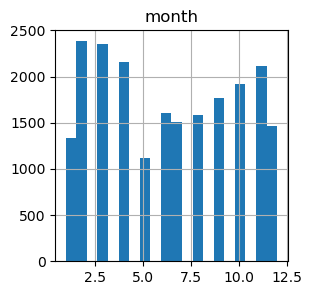

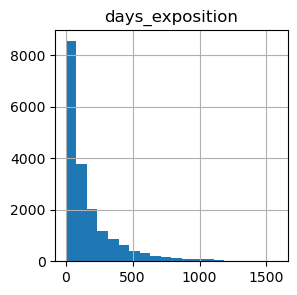

In [34]:
columns = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms',
          'ceiling_height', 'floor', 'floors_total', 'weekday', 'month',
           'days_exposition']
for col in columns:
    df.hist(col, bins=20, figsize=(3, 3))

Изучим как быстро продавались квартиры. Посчитаем среднее и медиану. Посмотрим, какие продажи можно считать быстрыми, а какие необычайно долгими.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21324 entries, 1 to 23564
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             21324 non-null  int64         
 1   last_price               21324 non-null  int32         
 2   total_area               21324 non-null  float64       
 3   first_day_exposition     21324 non-null  datetime64[ns]
 4   rooms                    21324 non-null  int64         
 5   ceiling_height           21324 non-null  float64       
 6   floors_total             21324 non-null  int32         
 7   living_area              21324 non-null  float64       
 8   floor                    21324 non-null  int64         
 9   is_apartment             21324 non-null  bool          
 10  is_studio                21324 non-null  bool          
 11  is_open_plan             21324 non-null  bool          
 12  kitchen_area             21324 n

Для этого анализа удалим случаи с 45, 60 и 90 днями в колонке 'days_exposition', так как они обусловлены истекшим сроком размещения, а не продажами.

In [95]:
df_days_exp = df.query('days_exposition < 45 or '
                       '46 <= days_exposition < 60 or '
                       '61 <= days_exposition < 90 or '
                       '91 <= days_exposition')['days_exposition']

Text(0, 0.5, 'amount')

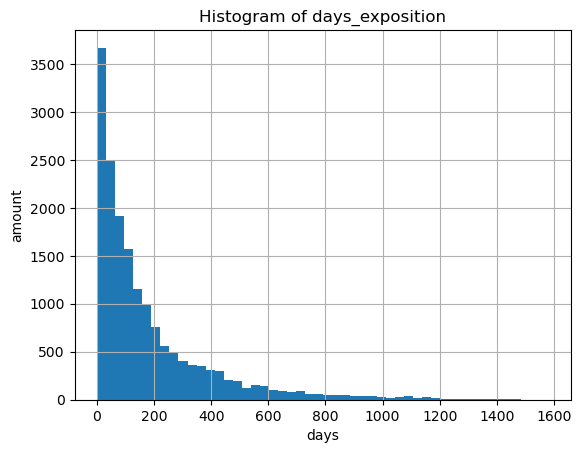

In [96]:
# Построим гистограмму
df_days_exp.hist(bins=50)
plt.title('Histogram of days_exposition')
plt.xlabel('days')
plt.ylabel('amount')

Форма распределения данных имеет ожидаемый тип - распределение Пуассона, пик в районе 90 дней обусловлен заполнением нами части пропущенных значений медианой.

In [97]:
df_days_exp.describe()

count    17145.000000
mean       183.167104
std        216.976406
min          1.000000
25%         39.000000
50%        105.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [99]:
# Выведем медиану
df_days_exp.median()

105.0

In [100]:
# Посмотрим на границы выбросов
q1 = df_days_exp.quantile(0.25)
q3 = df_days_exp.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

-261.0 539.0


Учитывая специфику рынка, большое количество продаж в первой квартильи выглядят необычно, посмотрим ближе распределение в этом диапазоне.

<Axes: >

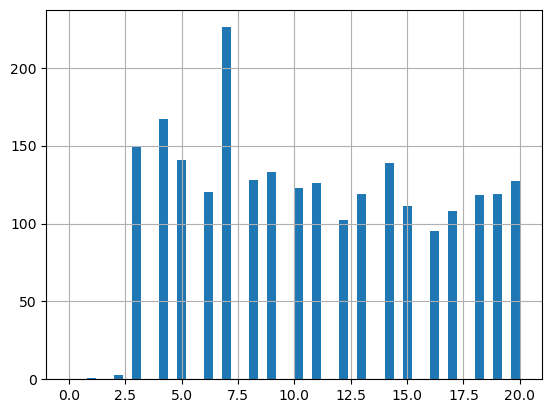

In [104]:
# Посмотрим поближе
df_days_exp.hist(bins=50, range=(0, 20))

Можно сказать, что в большинстве случаев, продажа квартиры занимала 105 дней, быстрые продажи - те, которые занимали менее 39 дней, долгие - те, что занимали более 239 дней, аномально долгие - те, что занимали более 539 дней. Большое количество продаж в срок до 15 дней выглядят подозрительно, учитывая специфику рынка - это аномально быстрые продажи. 
Есть пики на 7 и 30 днях, возможно это снятые обьявления или квартиры действительно на 7 или 30 день продавались лучше. 

<Axes: >

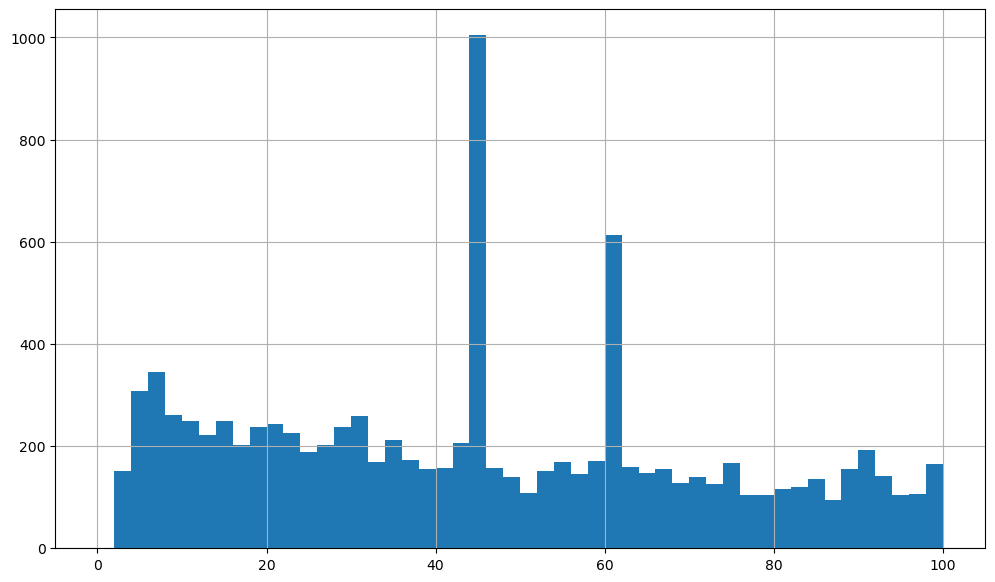

In [105]:
# Код ревьюера
df['days_exposition'].hist(bins=50, range=(0,100), figsize=(12, 7))

**Проверим, какие факторы больше всего влияют на стоимость объекта.**

***Площадь квартиры***

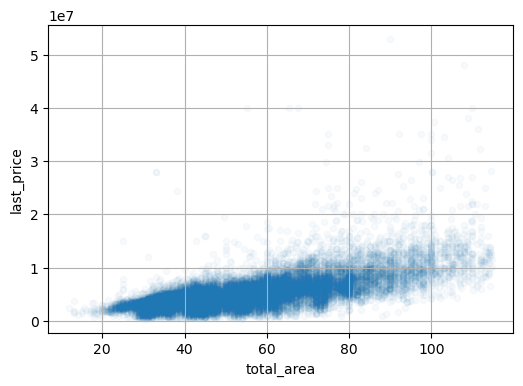

In [43]:
# Построим диаграмму рассеивания, чтобы оценить влияние метража на стоимость обьекта.
ax = df.plot(x='total_area', y='last_price', grid=True, figsize=(6, 4), kind='scatter', alpha=0.03)
plt.show()

In [44]:
# Посчитаем коэффициента Пирсона (кореляцию)
df['total_area'].corr(df['last_price'])

0.6770254175942122

In [45]:
# Узнаем, какие квартиры наиболее представлены на сайте.
df['total_area'].median()

49.1

In [46]:
# Проверим, зависит ли спрос от количества комнат(размера квартиры)
df.pivot_table(index='rooms', values='days_exposition', aggfunc=['median', 'mean'])

,median,mean
,days_exposition,days_exposition
rooms,,
0,49.0,110.435754
1,80.0,158.381913
2,90.0,168.984394
3,112.0,197.424770
4,132.0,223.042276


Видно, что чем больше комнат, тем дольше квартира 'висит' на сайте до продажи. Более дешевые обьекты продаются быстрее.

<Axes: xlabel='total_area', ylabel='price_sqm'>

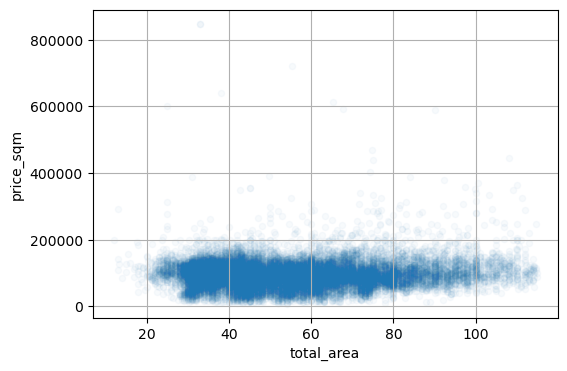

In [47]:
# Построим диаграмму рассеивания, чтобы оценить влияние метража на общую стоимость обьекта.
df.plot(x='total_area', y='price_sqm', grid=True, figsize=(6, 4), kind='scatter', alpha=0.03)

Взаимосвязь площади квартиры с ценой меньше ожидаемой, видимо это связано с тем, что квартиры большой площали имеют стоимость кв. метра меньшую, чем квартиры меньшего размера. Можно сделать вывод, что цена квадратного метра квартиры в некоторой степени обратно пропорциональна ее размеру. Видимо это связано со спросом на большие квартиры, т.к. несмотря на ограниченное предложение, такие квартиры не пользуются спросом (обьявления дольше висят на сайте), поэтому цена за метр ниже, чем у квартир меньшего размера. Наиболее популярные квартиры - 45-55 м2.

***Жилая площадь***

<Axes: xlabel='living_area', ylabel='price_sqm'>

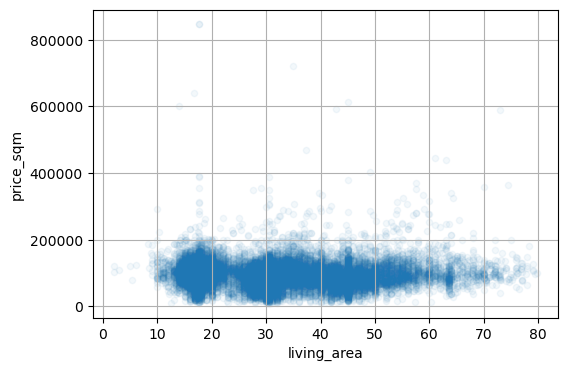

In [48]:
# Построим диаграмму рассеивания, чтобы оценить влияние метража жилой площади на стоимость квадратного метра.
df.plot(x='living_area', y='price_sqm', grid=True, figsize=(6, 4), kind='scatter', alpha=0.05)

In [49]:
# Посчитаем коэффициента Пирсона (кореляцию)
df['living_area'].corr(df['price_sqm'])

-0.03593021488484106

In [50]:
# Узнаем, какие квартиры наиболее представлены на сайте.
df['living_area'].median()

29.8

<Axes: xlabel='living_area', ylabel='last_price'>

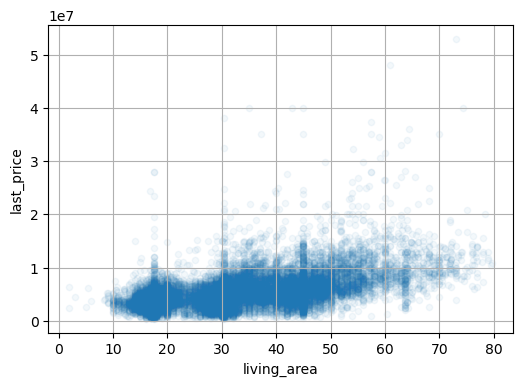

In [51]:
# Построим диаграмму рассеивания, чтобы оценить влияние метража на общую стоимость обьекта.
df.plot(x='living_area', y='last_price', grid=True, figsize=(6, 4), kind='scatter', alpha=0.05)

Чем метраж больше, тем квартира дороже.

Явно просматриваются однокомнатные, духкомнатные и трехкомнатные квартиры. Представленность четырехкомнатных квартир небольшая, на диаграмме они почти не просматриваются и цена на квардратный метр ниже, видимо это связано со спросом на такого типа квартиры.

***Площадь кухни***

<Axes: xlabel='kitchen_area', ylabel='price_sqm'>

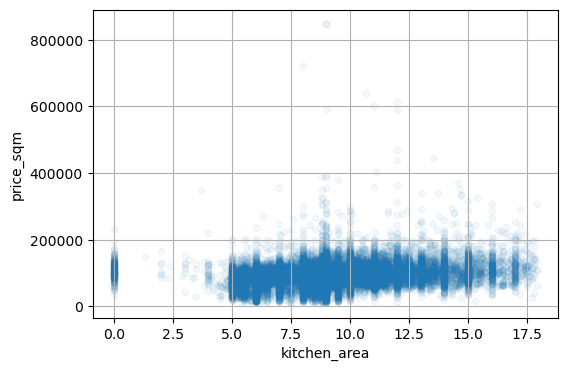

In [52]:
# Построим диаграмму рассеивания, чтобы оценить как влияет площадь кухни на стоимость квадратного метра.
df.plot(x='kitchen_area', y='price_sqm', grid=True, figsize=(6, 4), kind='scatter', alpha=0.05)

<Axes: xlabel='kitchen_area', ylabel='last_price'>

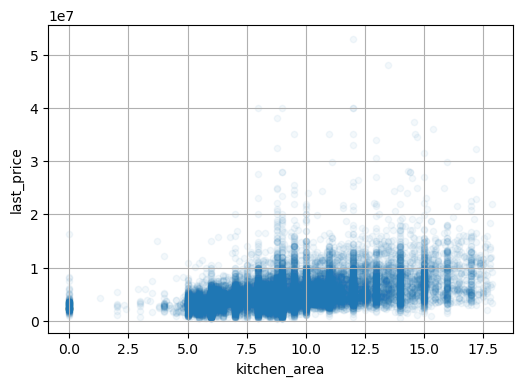

In [53]:
# Построим диаграмму рассеивания, чтобы оценить влияние размера кухни на общую стоимость квартиры
df.plot(x='kitchen_area', y='last_price', grid=True, figsize=(6, 4), kind='scatter', alpha=0.05)

In [54]:
# Посчитаем коэффициента Пирсона (кореляцию)
df['kitchen_area'].corr(df['price_sqm'])

0.23427367966511467

In [55]:
# Посчитаем коэффициента Пирсона (кореляцию)
df['kitchen_area'].corr(df['last_price'])

0.4431827686954952

In [56]:
# Узнаем, квартиры с каким размером кухни наиболее представлены на сайте.
df['kitchen_area'].median()

9.0

Цена за квадратный метр в небольшой степени пропорциональна размеру кухни, чем больше кухня, тем дороже квадратный метр. Видимо это связано с новостройками и старым фондом, так как в старых домах, как правило, кухни были маленькими, а в новостройках сейчас стараются делать большие кухни.
Корреляция размера кухни и общей стоимости квартиры в два раза сильнее, это говорит в большей степени о том, что чем больше квартира, тем больше у нее метраж кухни.

***Количество комнат***

<Axes: xlabel='rooms', ylabel='price_sqm'>

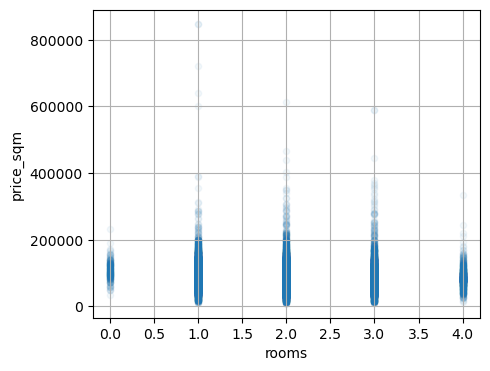

In [57]:
# Построим диаграмму рассеивания, чтобы оценить влияние количества комнат на стоимость т2.
df.plot(x='rooms', y='price_sqm', grid=True, figsize=(5, 4), alpha=0.05, kind='scatter')

In [58]:
# Посчитаем коэффициента Пирсона (кореляцию)
df['rooms'].corr(df['last_price'])

0.4012677044570338

In [59]:
# Посчитаем коэффициента Пирсона (кореляцию)
df['rooms'].corr(df['total_area'])

0.8016851383666163

In [60]:
# Посчитаем коэффициента Пирсона (кореляцию)
df['rooms'].corr(df['price_sqm'])

-0.1342915730896775

In [61]:
# Сгруппируем по количеству комнат и визуализируем медиану стоимости квадратного метра
df.pivot_table(index='rooms', values='price_sqm', aggfunc=['median', 'mean', 'count'])

,median,mean,count
,price_sqm,price_sqm,price_sqm
rooms,,,
0,105098.0,108075.180311,193
1,100000.0,100309.519964,7839
2,91666.7,92426.012327,7463
3,86592.2,89072.497797,5083
4,84675.0,86478.516890,746


In [62]:
# Сгруппируем по количеству комнат и визуализируем медиану количества дней на сайте
df.pivot_table(index='rooms', values='days_exposition', aggfunc=['median', 'mean'])

,median,mean
,days_exposition,days_exposition
rooms,,
0,49.0,110.435754
1,80.0,158.381913
2,90.0,168.984394
3,112.0,197.424770
4,132.0,223.042276


Количество комнат ожидаемо влияет на стоимость квартиры, и в то же время стоимость квадрата в небольшой степени обратно пропорциональна количеству комнат, поэтому стоимость м2 многокомнатной квартиры меньше, чем в однокомнатной (отрицательная динамика). \
Отдельный случай - студии, они продаются еще лучше, чем однокомнатные, цена кв. метра выше, но в то же время это наименее представленная категория.
Самые популярные квартиры - однокомнатные, эта категория хорошо представлена и продается быстрее остальных. Четырехкомнатные квартиры самые непопулярные, и учитывая, что у них самый большой разрыв между медианой и средним, в данной категории доля квартир с очень долгой реализацие больше, чем в остальных.

***Тип этажа***

Text(0, 0.5, 'amount')

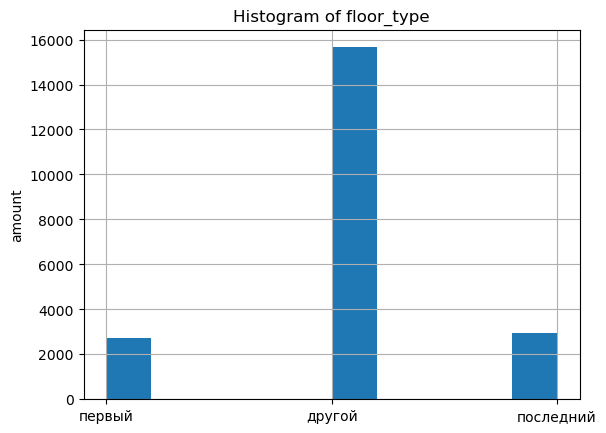

In [63]:
# Построим гистограмму
df['floor_type'].hist()
plt.title('Histogram of floor_type')
plt.ylabel('amount')

In [64]:
# Сгруппируем по типу этажа и визуализируем медиану стоимости квадратного метра
df.pivot_table(index='floor_type', values='price_sqm', aggfunc='median')

,price_sqm
floor_type,
другой,96875.00
первый,80789.50
последний,85104.85


In [65]:
# Сгруппируем по типу этажа и визуализируем медиану общей стоимости
df.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'mean'])

,median,mean
,last_price,last_price
floor_type,,
другой,4600000,5.290203e+06
первый,3800000,4.181766e+06
последний,4000000,4.615617e+06


In [66]:
# Сгруппируем по типу этажа и визуализируем медиану стоимости квадратного метра
df.pivot_table(index='floor_type', values='price_sqm', aggfunc=['median', 'mean'])

,median,mean
,price_sqm,price_sqm
floor_type,,
другой,96875.00,98673.565447
первый,80789.50,80250.828645
последний,85104.85,85157.923496


In [67]:
# Посчитаем коэффициента Пирсона (кореляцию)
df['floor'].corr(df['price_sqm'])

0.19874189743616225

In [68]:
# Посчитаем коэффициента Пирсона (кореляцию)
df['floor'].corr(df['last_price'])

0.10451265856389255

Тип этажа довольно сильно влияет на стоимость квадратного метра и общую стоимость квартиры. Первый этаж менее котируется на рынке, чем последний, но в то же время два этих типа значительно дешевле любого другого этажа.

***День недели, месяц, год***

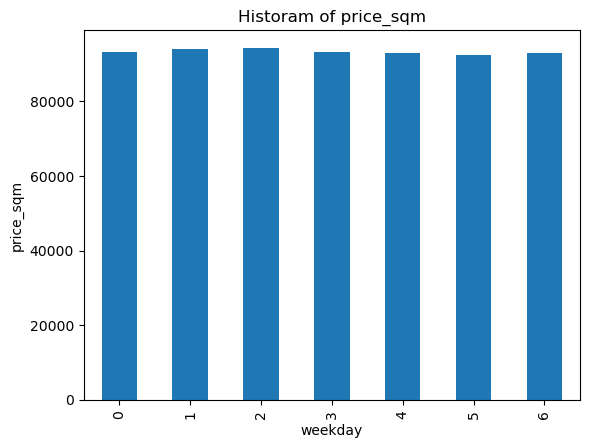

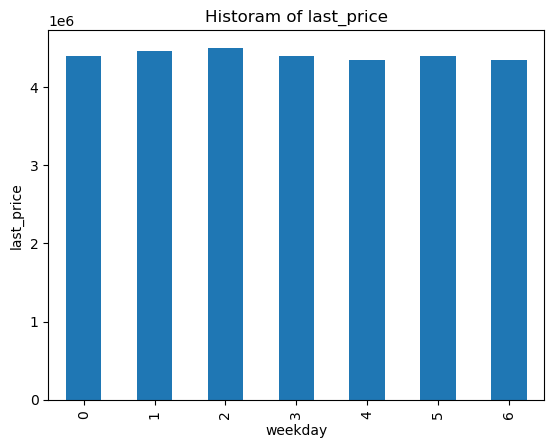

Corr of price_sqm -0.00865430658054951
Corr of last_price -0.009082976739956729


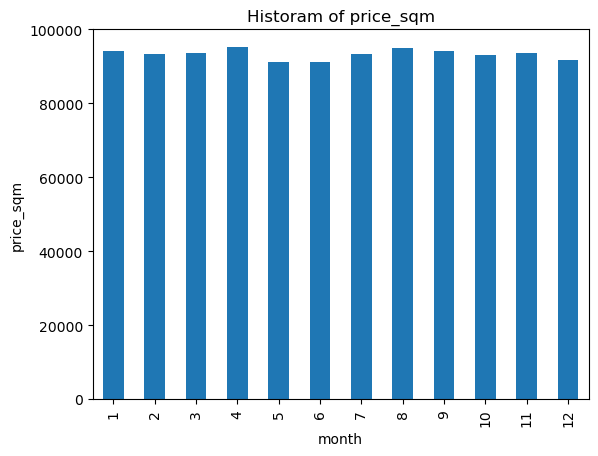

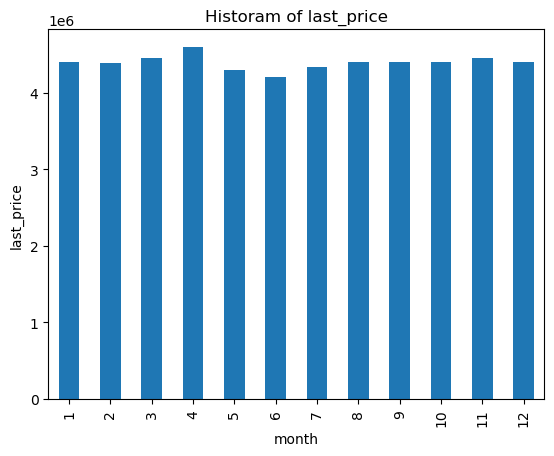

Corr of price_sqm -0.006566801500442601
Corr of last_price -0.0012466693936619049


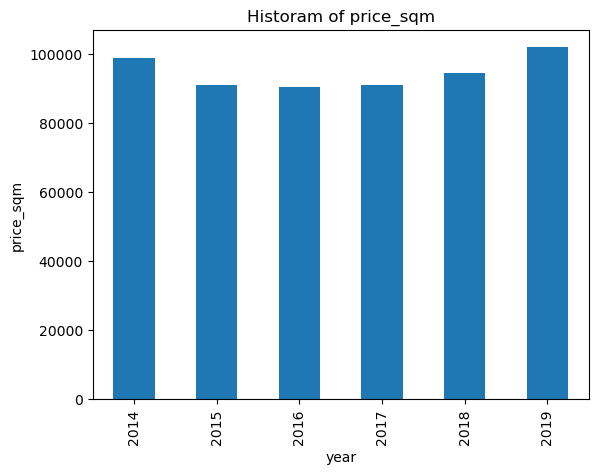

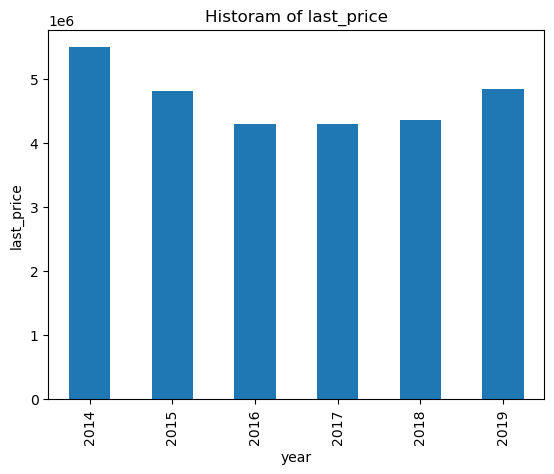

Corr of price_sqm 0.05457347636304521
Corr of last_price -0.00359536545591495


In [69]:
dt = ['weekday', 'month', 'year']
for date in dt:
    df.groupby(date)['price_sqm'].median().plot(kind='bar')
    plt.title('Historam of price_sqm')
    plt.ylabel('price_sqm')
    plt.show()
    df.groupby(date)['last_price'].median().plot(kind='bar')
    plt.title('Historam of last_price')
    plt.ylabel('last_price')
    plt.show()
    print(f'Corr of price_sqm {df[date].corr(df["price_sqm"])}')
    print(f'Corr of last_price {df[date].corr(df["last_price"])}')
    

In [70]:
# Проверим количество случаев в каждом году
df.pivot_table(index='year', values='price_sqm', aggfunc='count')

,price_sqm
year,
2014,89
2015,970
2016,2457
2017,7399
2018,7796
2019,2613


В целом, месяц и день недели не влияют на стоимость м2 квартиры, либо это влияние крайне незначительно, хотя в мае - июне, стоимость квартир и квадратного метра немного ниже. \ В целом стоимсоть квартир и квадратного метра, падает после 2014 года, но начиная с 2018 года наблюдается рост, возможно это связано с инфляцией и восстановлением рынка, после кризиса 2014 года.

**Посмотрим как влияют на количество дней на сайте(спрос) разные признаки**

In [71]:
# Сформируем датафрейм с кореляцией каждого признака с количеством дней на сайте  
correl = []
for column in columns:
    correl.append([df['days_exposition'].corr(df[column])])

correlation = pd.DataFrame(index=columns, data=correl, columns=['correlation'])
correlation

,correlation
total_area,0.115255
living_area,0.098084
kitchen_area,0.067335
last_price,0.080987
rooms,0.084308
ceiling_height,0.057995
floor,-0.036389
floors_total,-0.038650
weekday,-0.023595
month,-0.037085


<Axes: xlabel='year'>

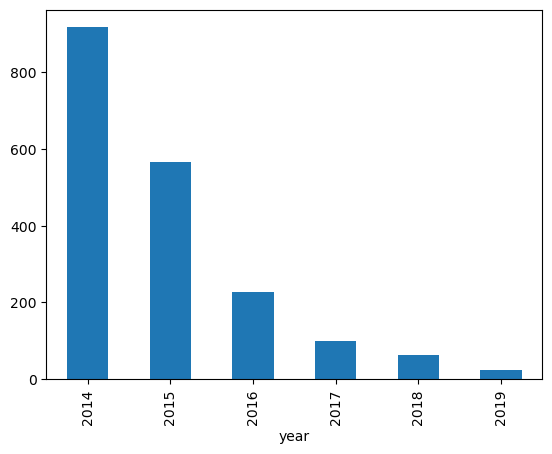

In [72]:
# Строим столбчатый график. Проверим влияние года на длительность присутсвия обьявления на сайте
df.groupby('year')['days_exposition'].median().plot(kind='bar')

<Axes: xlabel='month'>

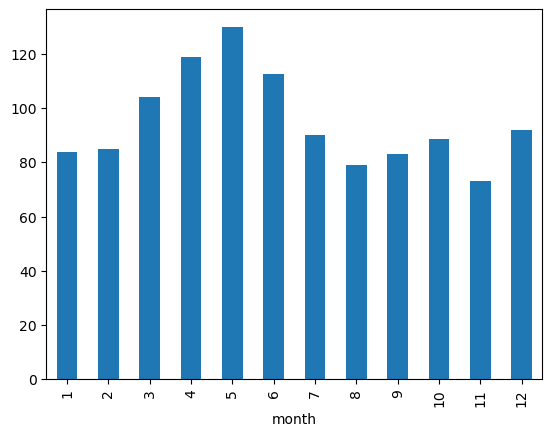

In [73]:
# Проверим влияние месяца на длительность присутсвия обьявления на сайте
df.groupby('month')['days_exposition'].median().plot(kind='bar')

In [74]:
# Проверим влияние месяца на длительность присутсвия обьявления на сайте
df.groupby('month')['days_exposition'].median().diff()

month
1      NaN
2      1.0
3     19.0
4     15.0
5     11.0
6    -17.5
7    -22.5
8    -11.0
9      4.0
10     5.5
11   -15.5
12    19.0
Name: days_exposition, dtype: float64

In [75]:
# Сгруппируем по типу этажа и визуализируем медиану и среднее количества дней на сайте
df.pivot_table(index='floor_type', values='days_exposition', aggfunc=['median', 'mean'])

,median,mean
,days_exposition,days_exposition
floor_type,,
другой,88.0,166.537582
первый,114.0,200.401643
последний,97.0,180.671016


<Axes: xlabel='rooms'>

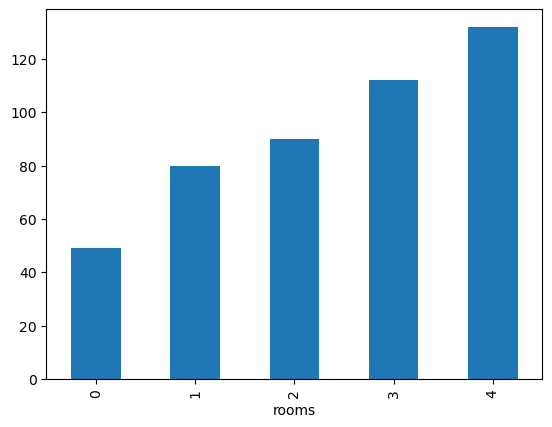

In [76]:
# Проверим влияние количества комнат на длительность присутсвия обьявления на сайте
df.groupby('rooms')['days_exposition'].median().plot(kind='bar')

С каждым годом спрос все устойчивее, квартиры продаются все быстрее. Возможно это связано развитием сервиса, увеличивающейся аудиторией. \
\
Квартиры выставленные с марта по июнь, висят дольше. Ранее мы выяснили, что в мае-июне заметно снижение цен, видимо это связано с пониженным спросов в предверии отпусков, квартиры продаются хуже и продавцы снижают цену. \
\
Квартиры, объявления о продажи которых выложены во второй половине года, продаются лучше. \
Находящиеся на первом этаже имеют большую долю очень долго продающихся квартир, чем другие типы этажей. \
Также мы выяснили, что чем меньше комнат, тем квартиры продаются быстрее. \
\
Остальные признаки на количество дней на сайте влияют незначительно.

**Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом обьявлений**

In [77]:
# Группировка данных по населенным пунктам и подсчет количества объявлений, выбор 10 самых представленных, сортировка
top_licalities = df['locality_name'].value_counts().head(10)
top_licalities

санктпетербург    13706
мурино              564
кудрово             436
шушары              430
всеволожск          385
пушкин              330
колпино             329
парголово           315
гатчина             301
выборг              220
Name: locality_name, dtype: int64

In [78]:
# Находим среднюю цену квадратного метра для каждого населенного пункта из списка top_licalities
mean_sqm = (df[df['locality_name'].isin(top_licalities.index)]
                                  .groupby('locality_name')['price_sqm']
                                  .mean())
mean_sqm

locality_name
всеволожск         68519.603377
выборг             57944.871818
гатчина            68803.419269
колпино            75372.009726
кудрово            95650.117431
мурино             86415.723050
парголово          90687.241587
пушкин            100912.911515
санктпетербург    108995.052918
шушары             78610.743721
Name: price_sqm, dtype: float64

In [79]:
# Сотртируем Series
mean_sqm.sort_values()

locality_name
выборг             57944.871818
всеволожск         68519.603377
гатчина            68803.419269
колпино            75372.009726
шушары             78610.743721
мурино             86415.723050
парголово          90687.241587
кудрово            95650.117431
пушкин            100912.911515
санктпетербург    108995.052918
Name: price_sqm, dtype: float64

Населенные пункт с самой низкой ценой квадратного метра - Выборг, а с самой высокой ценой - Санкт-Петербург.

**Проверим, как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге.**

Посчитаем среднюю цену каждого километра удаленности от цента Санкт-Петербурга, построим график.

In [80]:
# Выделим в отдельный датафрейм обьявления квартирах только из Санкт-Петербурга
spb_sale = df.query('locality_name == "санктпетербург"')
spb_sale.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,is_anomal,price_sqm,weekday,month,year,floor_type,city_center_distance_km
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,2.0,574.0,558.0,True,92785.7,3,8,2015,другой,14
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,0.0,NaN,289.0,False,88524.6,6,2,2017,другой,15
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,2.0,553.0,137.0,False,127525.3,3,11,2017,другой,14
15,16,4650000,39.0,2017-11-18,1,2.65,14,20.5,5,True,...,1.0,296.0,19.0,False,119230.8,5,11,2017,другой,14
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,True,...,0.0,NaN,397.0,True,81707.3,3,11,2017,первый,11


<Axes: xlabel='city_center_distance_km'>

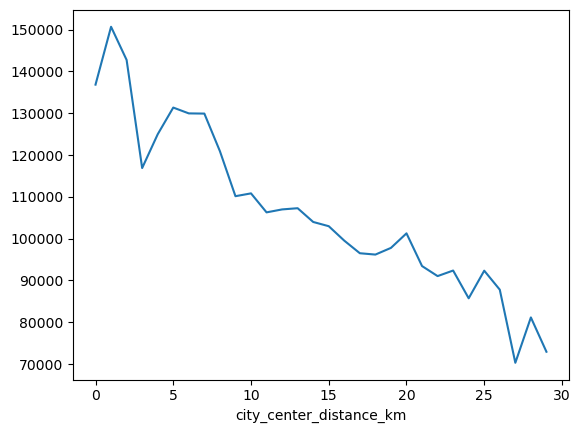

In [81]:
# Сгруппируем по количеству км от центра и посчитаем среднюю цену за м2 для каждой группы
spb_sale_sqm = spb_sale.groupby('city_center_distance_km')['price_sqm'].mean()

# Построим график
spb_sale_sqm.plot()

In [82]:
# Вычисление короеляции
df['city_center_distance_km'].corr(df['price_sqm'])

0.12806265678096881

In [83]:
# Среднее изменение цены за каждый км от центра
spb_sale_sqm.diff().mean()

-2203.1717376605816

Цена за квадратный метр в Санкт-Петербурге сильно зависит от удаленности от центра - чем дальше от центра, тем она ниже. В среднем, цена падает на 1600 рублей за каждый км. от центра.

**Вывод**: \
Можно сказать, что в большинстве случаев, продажа квартиры занимала 105 дней, быстрые продажи - те, которые занимали менее 40 дней, долгие - те, что занимали более 235 дней, аномально долгие - те, что занимали более 527 дней. Большое количество продаж в срок до 15 дней выглядят подозрительно, учитывая специфику рынка - это аномально быстрые продажи. С каждым кодом эти показатели падают.
На цену квадратного метра больше всего влияют:
- количество комнат в квартире: чем больше комнат, тем цена квадрата ниже, зависимость обратно пропорциональная;
- этаж на котором расположена квартира: первый менее котируется на рынке, чем последний, но оба этих типа значительно менее ценны, чем любой другой этаж;
- удаленность от центра города.

Самые востребованные на рынке квартиры - однокомнатные квартиры и студии, находящиеся на любом этаже кроме первого и последнего. \
Наименее востребованные - четырехкомнатные, находящиеся на первом этаже. 


### Общий вывод

Файл содержал 23698 обьявлений, каждое описывается 22 признаками (столбцами) 17 из которых числовые, 3 категориальных булевого типа ('is_apartment', 'studio', 'open_plan'), 1 категориальный строкового типа содержит название населеного пункта ('locality_name'), и 1 содержит строковое представление даты ('first_day_exposition'). \
В данных были проблемы:
- пропуски; 
- аномалии, например потолки высотой 25 и 100 м в столбце 'ceiling_height';
- некоторые названия столбцов нуждались в коррекции : 'cityCenters_nearest' насписан в разном регистре, у булевых столбцов разный стиль написания;
- часть столбцов имеют некорректный тип данных :'floors_total', 'balcony', 'parks_around3000', 'parks_nearest',	'ponds_around3000',	'ponds_nearest', 'days_exposition' - имеют вещественный тип данных, но для сокращения времени обработки датафрейма и корректности тут более уместен целочисленный тип данных, 'is_apartment' - строковый вместо типа bool.

Мы обработали большое количество пропусков. Часть из них мы не смогли заполнить, поэтому чтобы улучшить сбор данных и сделать точнее анализ данных в будущем, рекомендуется количество балконов сделать на основании выпадающего списка - ChoiceField. \
\
У 13% случаев не заполнено поле days_exposition, видимо эти квартиры не были проданы, поэтому в дальнейшем рекомендуется предусмотреть для таких случаев дополнительное поле-маркер, чтобы можно было отличить ошибку выгрузки, от непроданных квартир. \
Также рекомендуется в поле is_apartment автоматически проставлять True, убрать это поле из формы клиента, оставив только возможность заполнения полей is_studio и is_open_plan, это сократит форму и сократит услия для ее заполнения, что положительно скажется на сокращении пропусков в других столбцах. \
\
Также рекомендуется в поле is_apartment автоматически проставлять True, убрать это поле из формы клиента, оставив только возможность заполнения полей is_studio и is_open_plan, это сократит форму и сократит услия для ее заполнения, что положительно скажется на сокращении пропусков в других столбцах. \
\
С помощью регулярного выражения мы заменили много дублирующихся названий населенных пунктов. \
Рекомендуется перевести заполнение данного пункта на тип ChoiceField - заполнение из выпадающего списка, либо на основании катографических данных. \
\
В ходе очистки данных, мы выявили аномалии в столбце ceiling_height - некоторые значения были введены с неправильно проставленной запятой, а также некоторые значения имеют нереальные значения, которые воостановить не удалось. Наличие таких аномалий говорит о том, что данные вводились вручную. Рекомендуется поставить ограничение на это поле при вводе клиентом - высота потолков не может быть двузначным значением и более. \
\
Мы добавили необходимые для дальнейшего анализа новые столбцы:
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

А также удалили низкочастотные случаи в столбце 'year' - случаи за 2014 год.

**В ходе исследовательского анализа нами были сделаны следующие выводы:** \
Можно сказать, что в большинстве случаев, продажа квартиры занимала 105 дней, быстрые продажи - те, которые занимали менее 40 дней, долгие - те, что занимали более 235 дней, аномально долгие - те, что занимали более 527 дней. Большое количество продаж в срок до 15 дней выглядят подозрительно, учитывая специфику рынка - это аномально быстрые продажи. 
Есть пики на 7 и 30 днях, возможно это снятые обьявления или квартиры действительно на 7 или 30 день продавались лучше. \
\
Взаимосвязь площади квартиры с ценой небольшая, видимо это связано с ограниченным ассортиментом квартир большого метража. Можно сделать вывод, что цена квадратного метра квартиры в некоторой степени обратно пропорциональна ее размеру. Видимо это связано со спросом на большие квартиры, т.к. несмотря на ограниченное предложение, такие квартиры не пользуются спросом (обьявления дольше висят на сайте), поэтому цена за метр ниже, чем у квартир меньшего размера. Наиболее популярные квартиры - 40-50 м2. \
\
Представленность четырехкомнатных квартир небольшая, на диаграмме они почти не просматриваются и цена на квардратный метр ниже, видимо это связано со спросом на такого типа квартиры. \
\
Цена за квадратный метр в небольшой степени пропорциональна размеру кухни, чем больше кухня, тем дороже квадратный метр. Видимо это связано с новостройками и старым фондом, так как в старых домах, как правило, кухни были маленькими, а в новостройках сейчас стараются делать большие кухни. Корреляция размера кухни и общей стоимости квартиры в два раза сильнее, это говорит в большей степени о том, что чем больше квартира, тем больше у нее метраж кухни. \
\
Количество комнат ожидаемо влияет на стоимость квартиры, и в то же время стоимость квадрата в небольшой степени обратно пропорциональна количеству комнат, поэтому стоимость м2 многокомнатной квартиры меньше, чем в однокомнатной (отрицательная динамика). \
Отдельный случай - студии, они продаются еще лучше, чем однокомнатные, цена кв. метра выше, но в то же время это наименее представленная категория.
Самые популярные квартиры - однокомнатные, эта категория хорошо представлена и продается быстрее остальных. Четырехкомнатные квартиры самые непопулярные, и учитывая, что у них самый большой разрыв между медианой и средним, в данной категории доля квартир с очень долгой реализацие больше, чем в остальных. \
\
Тип этажа довольно сильно влияет на стоимость квадратного метра и общую стоимость квартиры. Первый этаж менее котируется на рынке, чем последний, но в то же время два этих типа значительно дешевле любого другого этажа. Интересно, что медиана в сводной таблице общей стоимости квартиры сдвинута вниз, относительно среднего, а в сводной таблицы цены за квадрат наоборот - выше относительно среднего, это говорит о том, что в данных есть много больших квартир, но с низкой стоимостью квадратного метра. \
\
В целом, месяц и день недели не влияют на стоимость м2 квартиры, либо это влияние крайне незначительно, хотя в мае - июне, стоимость квартир и квадратного метра немного ниже. \ В целом стоимсоть квартир и квадратного метра, падает после 2014 года, но начиная с 2018 года наблюдается рост, возможно это связано с инфляцией и восстановлением рынка, после кризиса 2014 года.
\
С каждым годом спрос все устойчивее, квартиры продаются все быстрее. Возможно это связано развитием сервиса, увеличивающейся аудиторией. \
\
Квартиры выставленные с марта по июнь, висят дольше. Ранее мы выяснили, что в мае-июне заметно снижение цен, видимо это связано с пониженным спросов в предверии отпусков, квартиры продаются хуже и продавцы снижают цену. \
\
Квартиры, объявления о продажи которых выложены во второй половине года, продаются лучше. \
Находящиеся на первом этаже имеют большую долю очень долго продающихся квартир, чем другие типы этажей. \
Также мы выяснили, что чем меньше комнат, тем квартиры продаются быстрее. \
\
Остальные признаки на количество дней на сайте влияют незначительно.
\
Населенные пункт с самой низкой ценой квадратного метра - Выборг, а с самой высокой ценой - Санкт-Петербург. \
\
Цена за квадратный метр в Санкт-Петербурге сильно зависит от удаленности от центра - чем дальше от центра, тем она ниже. В среднем, цена падает на 1600 рублей за каждый км. от центра. \
\
На цену квадратного метра больше всего влияют:
- количество комнат в квартире: чем больше комнат, тем цена квадрата ниже, зависимость обратно пропорциональная;
- этаж на котором расположена квартира: первый менее котируется на рынке, чем последний, но оба этих типа значительно менее ценны, чем любой другой этаж;
- удаленность от центра города.

Самые востребованные на рынке квартиры - однокомнатные квартиры и студии, находящиеся на любом этаже кроме первого и последнего. \
Наименее востребованные - четырехкомнатные, находящиеся на первом этаже. 
